In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv(r"C:\Users\abhis\Downloads\Zomato data .csv")

In [11]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [12]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [14]:
data.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [ ]:
# First converting datatype of rate from object to  float value and removing denominator

In [18]:
def HandleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

data['rate']=data['rate'].apply(HandleRate)



In [19]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
# no null value is there

In [ ]:
#Type of restaurant

Text(0.5, 0, 'Type of Restaurant')

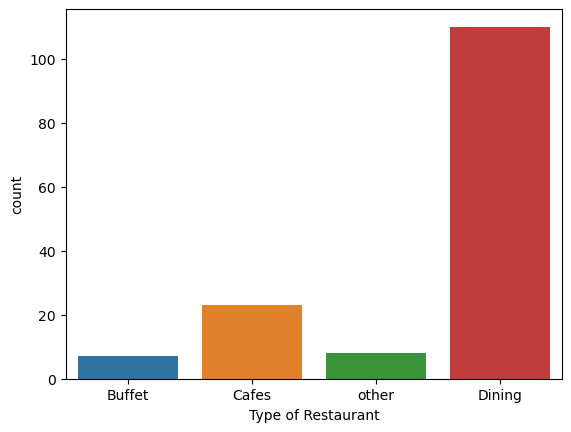

In [23]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Restaurant")

In [ ]:
# the majority of the taurants fallinto dining category

In [ ]:
#Dining restaurants preferred by a larger number of people

Text(0, 0.5, 'votes')

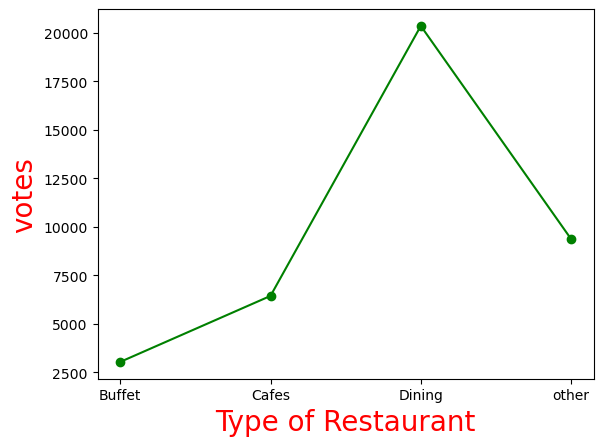

In [26]:
grouped_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel('Type of Restaurant',c="red",size=20)
plt.ylabel("votes",c="red",size=20)

In [ ]:
#The majority of restaurants received ratings

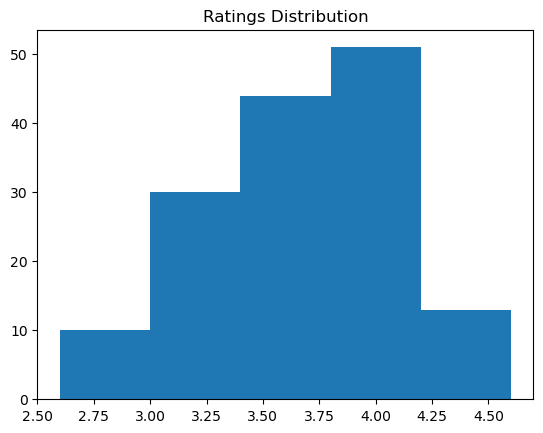

In [27]:
plt.hist(data['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

In [29]:
#conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

In [30]:
#The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

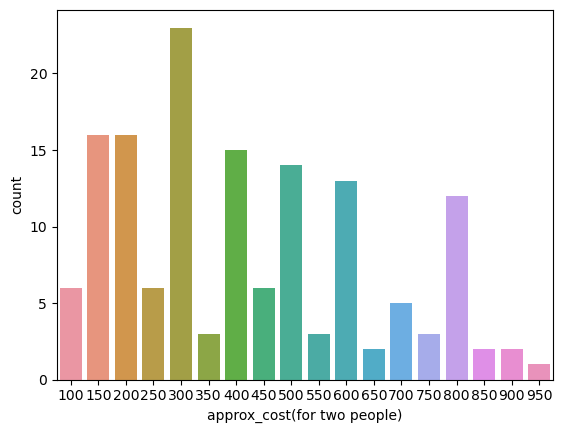

In [31]:
couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [ ]:
#whether online orders receive higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

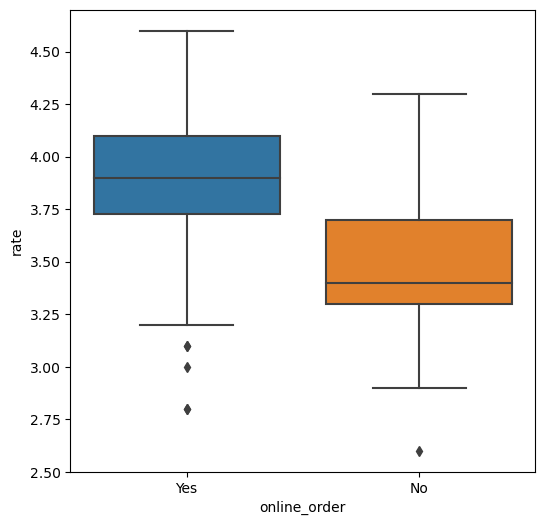

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=data)

In [ ]:
#conclusion: offline orders received lower ratings in comparison to online orders,which obtained excellent ratings.

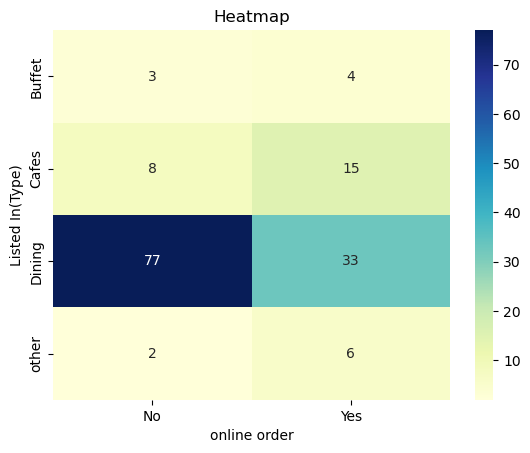

In [33]:

pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')

plt.title('Heatmap')
plt.xlabel("online order")
plt.ylabel("Listed In(Type)")
plt.show()